In [1]:
!ls ../18.03.19/

1076112.zip  467009.zip   600007.zip   613813.zip   658713.zip   753613.zip
12641325.zip 588410.zip   612813.zip   613913.zip   670913.zip   7852213.zip
1360912.zip  59908.zip    613113.zip   6413.zip     711213.zip   Icon?


In [2]:
import zipfile
import os
import pathlib
import tempfile
import pydicom
import numpy as np
from matplotlib import pyplot as plt

In [3]:
zippath = r'../18.03.19/1076112.zip'
dirpath = str(tempfile.TemporaryDirectory())
with zipfile.ZipFile(zippath, 'r') as file:
    file.extractall(dirpath)

In [4]:
dicomlist = list(map(str, pathlib.Path(dirpath).glob(r'**/*.dcm')))

In [5]:
pictures = {}
rois = {}

for path in dicomlist:
    file = pydicom.read_file(path)
    if hasattr(file, 'pixel_array'):
        uid = file.SOPInstanceUID
        pictures[uid] = path
    else:
        try:
            ref_uid = file.ContentSequence[0].\
                           ReferencedSOPSequence[0].\
                           ReferencedSOPInstanceUID
            rois[ref_uid] = path
        except AttributeError:
            continue

In [6]:
data = []

for uid in pictures:
    if uid in rois:
        picpath = pictures[uid]
        roipath = rois[uid]
        data.append((picpath, roipath))

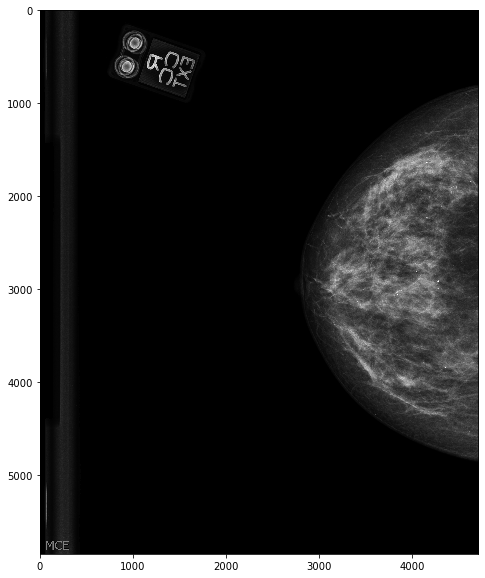

In [7]:
fig = plt.figure(figsize=(10, 10))
img = pydicom.read_file(picpath).pixel_array
_ = plt.imshow(img, cmap='gray')

In [8]:
import sys
sys.path.append('../roiparser')

In [9]:
from roiparser import parse_buffer, roi_info, load_buffer_from_file, ROI

In [18]:
buffer = load_buffer_from_file(roipath)
roi_list = parse_buffer(buffer)
roi_list = [roi_info(r) for r in roi_list]

In [17]:
roi_list[0]

{'points': [(3120.7454570665896, 2813.921811714247),
  (3082.569736851746, 2876.7354504013806),
  (3075.186985386902, 2936.6789909745007),
  (3096.1248515978396, 2981.251950874403),
  (3140.6286968126833, 3005.5094658280163),
  (3186.2217143908083, 2998.9047752762585),
  (3235.946995152527, 2953.968732490614),
  (3272.9297832384646, 2896.739682807997),
  (3256.7292827501833, 2852.114855423048),
  (3206.589023961121, 2812.555921211317),
  (3146.386143101746, 2803.375066413954)],
 'birads': 3}

In [23]:
from matplotlib import patches

In [24]:
contour = roi_list[0]['points']
birads = roi_list[0]['birads']

Birads category: 3


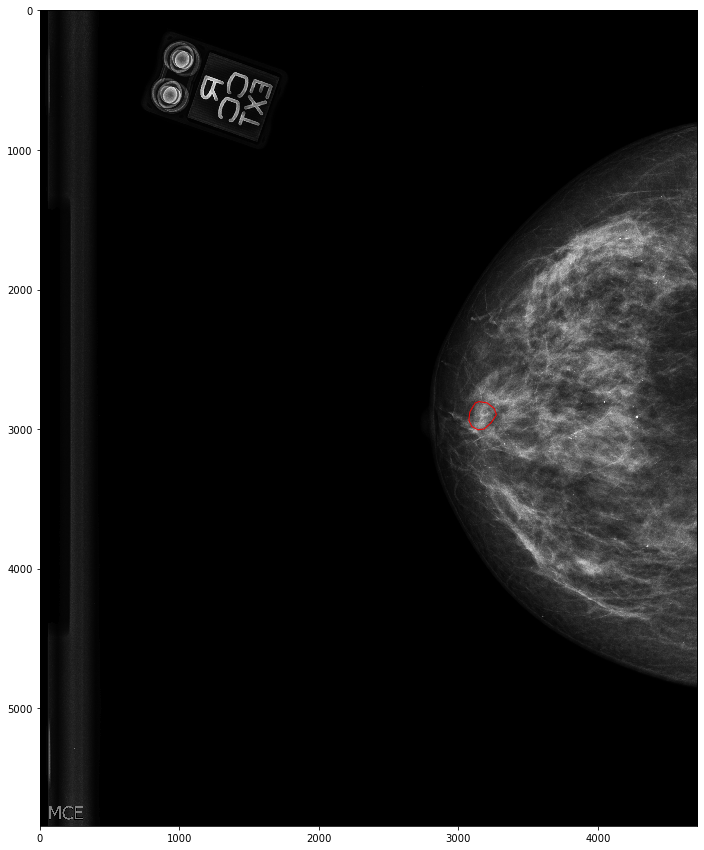

In [30]:
print('Birads category: {}'.format(birads))

fig = plt.figure(figsize=(15, 15))
img = pydicom.read_file(picpath).pixel_array
plt.imshow(img, cmap='gray')
poly = patches.Polygon(contour, closed=True, linewidth=1, edgecolor='r', fill=False)
plt.gca().add_patch(poly)
plt.show()